# Lesson 1: Classification

## Review

**Question:** What is classification? 

**Question:** Is classification a form of supervised or unsupervised learning? Why? 

Let's review the example we saw last time. The code below reads our data points from a file and then creates a scatterplot.

In [2]:
%matplotlib inline
# import necessary packages
import matplotlib.pyplot as plt 
import pandas
import numpy as np

# Read the data, and put it into a variable. 
data = pandas.read_csv("../assets/classification-synthetic.csv") 

# show the first five data points
# in the data, "r" stands for red, and "b" stands for blue
print(data.head()) 

     x     y class
0  2.0  10.0     r
1  3.0  10.0     r
2  1.0   8.0     r
3  2.5   9.0     r
4  2.0   7.0     r


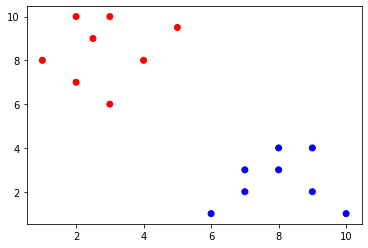

In [3]:
# Create a scatter plot. 
# "c" stands for color. We color our points by class.
plt.scatter(x=data["x"], y=data["y"], c=data["class"]) 

The red points are in group Red, and the blue points are in group Blue. The two classes have different characteristics; the Red class is in the top left corner of the plot, and the Blue class is in the bottom right.

If we are given a new point, we can classify it by how similar it is to the other data points. For example, the new point shown below belongs in the Red class.

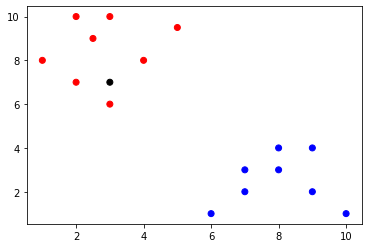

In [4]:
# Create a new point at (3,7) and color it black.
new_point = pandas.DataFrame({"x":[3], "y":[7], "class":["k"]}) 
# Add the new point to the dataset. 
new_data = data.append(new_point) 
plt.scatter(x=new_data["x"], y=new_data["y"], c=new_data["class"]) 

And the point below belongs to the Blue class since it is closer to the Blue points.

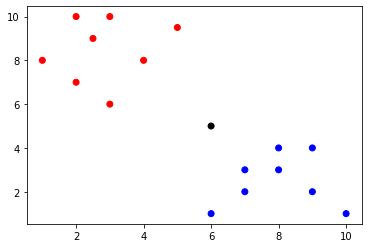

In [5]:
# Create and add a new point to the dataset. 
new_point = pandas.DataFrame({"x":[6], "y":[5], "class":["k"]}) 
new_data = data.append(new_point) 
plt.scatter(x=new_data["x"], y=new_data["y"], c=new_data["class"]) 

*Support vector machines* draw lines between classes. We can draw a line between the Red and Blue groups. New points on one side of the line belong to the Red group, and points on the other side of the line belong to the Blue group.

(0, 11)

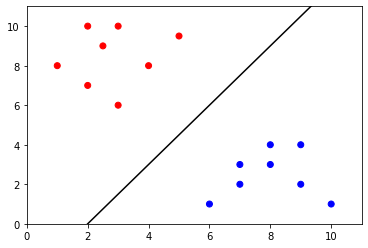

In [8]:
# Create an equidistant line between the classes
plt.scatter(x=data["x"], y=data["y"], c=data["class"]) 
x = np.linspace(0, 10, 1000)
plt.plot(x, 1.5*x-3, color='black')
plt.xlim(0,11)
plt.ylim(0,11)

## Classification for the World Happiness Dataset

We're going to take the World Happiness Dataset we examined last time and apply classification to it. 

Today, we are going to classify countries into three classes: **low, medium, and high happiness**. Low happiness is defined as a happiness score below A, while medium happiness is between A and B. High happiness is a score above B. 

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams
from PIL import Image
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import svm

%matplotlib inline
# figure size 
rcParams['figure.figsize'] = 20,20

In [78]:
# Load World Happiness Data
df = pd.read_csv("../assets/happiness2019dataset/2015.csv")

In [79]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [80]:
classification_data = df[["Happiness Score", 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']]
classification_data

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [140]:
# normalize the data
ss = StandardScaler()
transformed_data = ss.fit_transform(classification_data)
transformed_df = pd.DataFrame(transformed_data, index=classification_data.index, columns=classification_data.columns)
transformed_df

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Class
0,1.937360,1.369621,1.320281,1.263408,1.577438,2.309652,0.471040,0.758258,1.367830
1,1.914581,1.135226,1.514458,1.289434,1.332456,-0.016480,1.575856,1.092857,1.367830
2,1.884792,1.192861,1.361054,0.992229,1.469659,2.842774,0.824293,0.712335,1.367830
3,1.880411,1.525130,1.251922,1.035145,1.605131,1.852081,0.868638,0.663893,1.367830
4,1.797179,1.194876,1.221204,1.118054,1.360416,1.555725,1.748563,0.639337,1.367830
...,...,...,...,...,...,...,...,...,...
153,-1.674055,-1.552987,-0.800520,-0.818610,1.087740,3.413922,-0.087228,-2.588925,-1.833905
154,-1.783571,-1.392303,-2.346860,-1.263362,0.372033,-0.529210,-0.433117,-0.843967,-1.833905
155,-2.076199,-0.455245,-1.901086,0.372199,-1.809238,0.381419,1.856891,-3.208430,-1.833905
156,-2.164688,-2.067566,-2.118467,-1.649648,-2.064472,-0.357715,-0.316950,-0.481985,-1.833905


In [129]:
# add a new column with the class label

# silence warning
import warnings
warnings.filterwarnings('ignore')

# set scores >6 to high, <4 to low, and everything else to medium
# 1 is low, 2 is medium, 3 is high
classification_data["Class"] = 2
classification_data["Class"].loc[classification_data["Happiness Score"] > 6] = 3
classification_data["Class"].loc[classification_data["Happiness Score"] < 4] = 1

classification_data

,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Class
0,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,3
1,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,3
2,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,3
3,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,3
4,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,3
...,...,...,...,...,...,...,...,...,...
153,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,1
154,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,1
155,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,1
156,2.905,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302,1


In [154]:
# create an SVM
clf = svm.LinearSVC()
# apply the SVM to the data
clf.fit(transformed_df[["Happiness Score", 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual']], 
        classification_data["Class"])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

Text(0, 0.5, 'Economy (GDP per Capita) - Normalized')

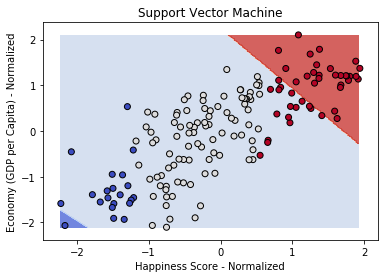

In [170]:
# Plot the SVM
xx, yy = np.meshgrid(np.arange(transformed_df["Happiness Score"].min(), 
                               transformed_df["Happiness Score"].max(), 0.02),
                     np.arange(transformed_df["Economy (GDP per Capita)"].min(), 
                               transformed_df["Economy (GDP per Capita)"].max(), 0.02)
                    )
length = xx.ravel().shape[0]

Z = clf.predict(np.c_[xx.ravel(), yy.ravel(), [0]*length, [0]*length, [0]*length, [0]*length, [0]*length, [0]*length])

Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

plt.scatter(transformed_df['Happiness Score'],
            transformed_df['Economy (GDP per Capita)'], 
            c=classification_data['Class'], 
            edgecolors='k',
            cmap=plt.cm.coolwarm)

plt.title('Support Vector Machine')
plt.xlabel('Happiness Score - Normalized')
plt.ylabel('Economy (GDP per Capita) - Normalized')

**Question**: Why do you think so many "low" and "high" happiness countries get misclassified as "medium" happiness? 

### Activity
Change the code in the cell above to plot a variable other than "Economy (GDP per Capita)." How is it different from the "Economy (GDP per Capita)" plot?